In [58]:
import pandas as pd
import fitter
import dill

In [59]:
def get_auswanderung():
    df = pd.read_excel("je-d-01.05.04.01.01.xlsx", sheet_name="Auswanderungen", header=2, nrows=49)

    df.set_index(df.columns[0], drop=True, inplace=True)
    df.index.name = ""

    df = df.transpose()

    df = df[["Total", "Schweizer", "Deutschland", "Österreich", "Frankreich", "Italien"]]

    df["Deutsch"] = df[["Schweizer", "Deutschland", "Österreich"]].sum(axis=1)
    df.drop(["Schweizer", "Deutschland", "Österreich"], axis=1, inplace=True)

    df["Andere"] = df["Total"] - df["Frankreich"] - df["Italien"] - df["Deutsch"]

    df.drop("Total", inplace=True, axis=1)

    df.columns = ["Französisch", "Italienisch", "Deutsch", "Andere"]

    df = df.transpose()

    df = df.apply(pd.to_numeric, errors="coerce")

    return df

get_auswanderung()

c:\Users\tobia\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2011 1,2012,2013,2014,2015,2016,2017,2018,2019,2020
Französisch,4299,4354,4086,3705,3942,3958,3710,3603,3963,3988,...,5889,6263,6177,6658,7469,7863,8124,9041,8645,7419
Italienisch,12257,16109,12242,10370,10399,11363,10405,9092,9182,8163,...,5266,5575,5929,6957,7938,8947,9570,9890,9458,8064
Deutsch,39305,39899,36703,37490,38299,39165,37906,37574,36226,37774,...,46345,48100,46183,46707,48263,47967,48532,48228,47163,39529
Andere,47472,56672,51994,47740,46869,48912,46500,44509,42433,40153,...,38994,43943,47907,50781,52961,55876,58771,63066,60955,54364


c:\Users\tobia\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


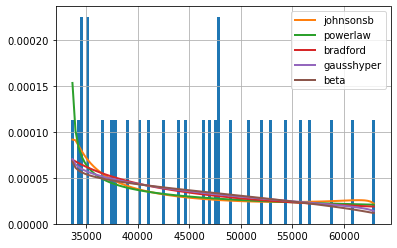

In [60]:
df_auswanderung = get_auswanderung()

dict_distributions = {}
for sprache in df_auswanderung.index.values:

    row_values = df_auswanderung.loc[sprache].dropna().values

    f = fitter.Fitter(row_values, timeout=60)
    f.fit()

    dict_distributions[sprache] = f.get_best()

dill.dump(dict_distributions, open("distributions_nach_sprache.pick", mode='wb'))